## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Insights of Data

In [3]:
toyota.shape

(1436, 38)

### As given in Problem Statement, we are creating dataset of required columns only.

In [4]:
toyota_df = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### No null values in the data

In [6]:
toyota_df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
toyota_df.shape

(1436, 9)

## Data Analysis

### Correlation between features

In [9]:
toyota_df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


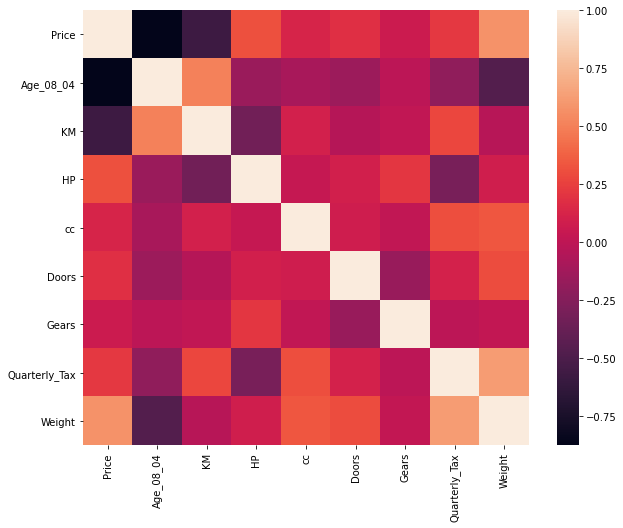

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(toyota_df.corr())
plt.show()

### Plotting boxplots for each features

Text(0.5, 1.0, 'Weight')

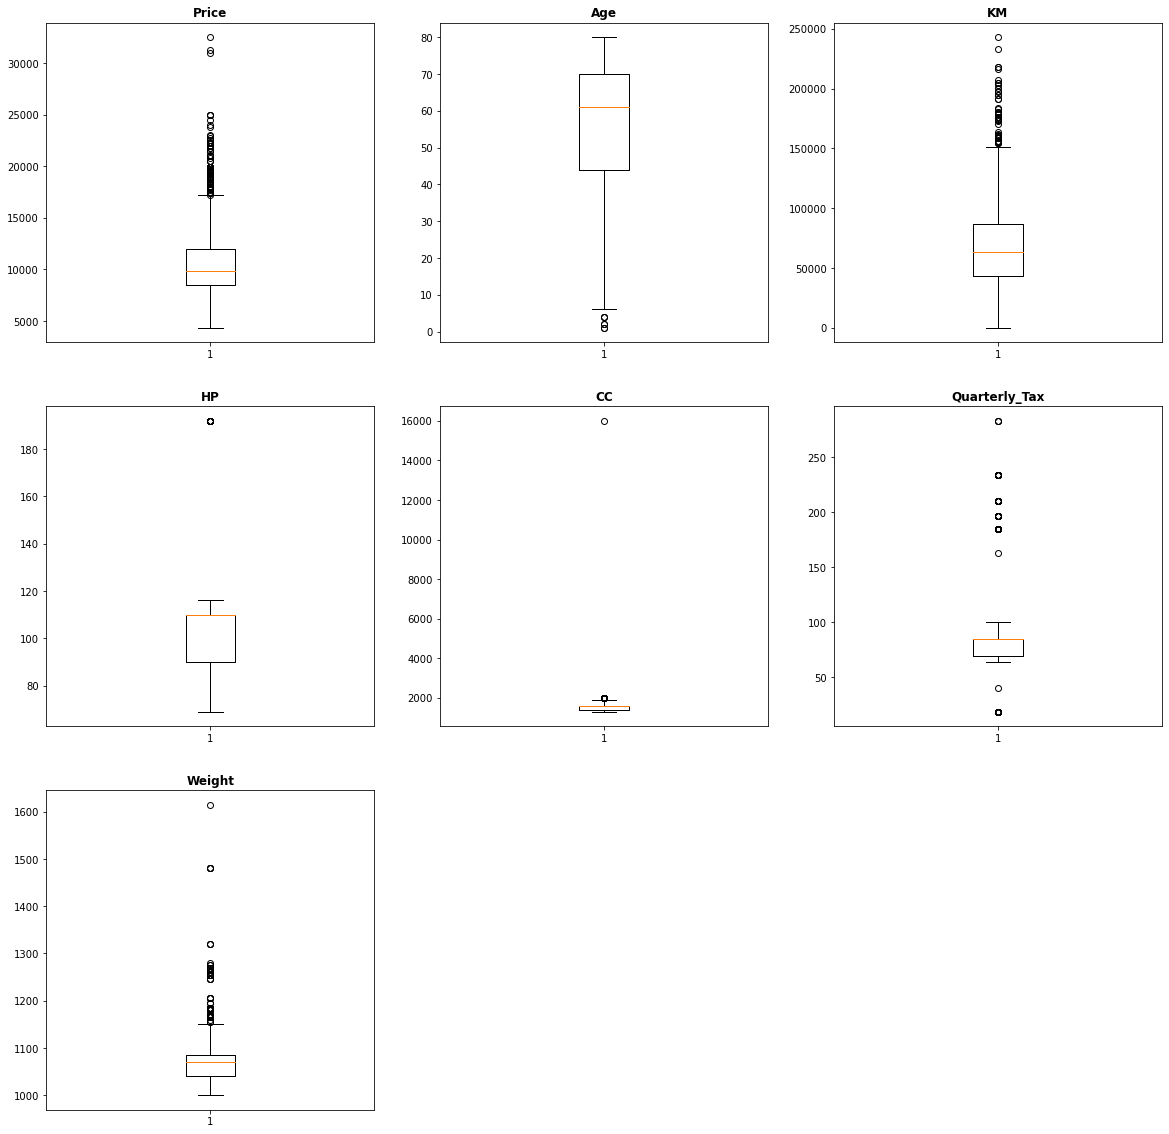

In [11]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
plt.boxplot('Price', data = toyota_df)
plt.title('Price', fontweight = 'bold')

plt.subplot(3,3,2)
plt.boxplot('Age_08_04', data = toyota_df)
plt.title('Age', fontweight = 'bold')

plt.subplot(3,3,3)
plt.boxplot('KM', data = toyota_df)
plt.title('KM', fontweight = 'bold')

plt.subplot(3,3,4)
plt.boxplot('HP', data = toyota_df)
plt.title('HP', fontweight = 'bold')

plt.subplot(3,3,5)
plt.boxplot('cc', data = toyota_df)
plt.title('CC', fontweight = 'bold')

plt.subplot(3,3,6)
plt.boxplot('Quarterly_Tax', data = toyota_df)
plt.title('Quarterly_Tax', fontweight = 'bold')

plt.subplot(3,3,7)
plt.boxplot('Weight', data = toyota_df)
plt.title('Weight', fontweight = 'bold')

### Standardizing the values of data

In [13]:
scaler = MinMaxScaler()
toyota_std = scaler.fit_transform(toyota_df)
toyota_std = pd.DataFrame(toyota_std, columns=toyota_df.columns)
toyota_std.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423


## Building Model

In [14]:
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota_std).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:30:28   Log-Likelihood:                 2336.7
No. Observations:                1436   AIC:                            -4655.
Df Residuals:                    1427   BIC:                            -4608.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3836      0.015     24.809      0.000       0.353       0.414
Age_08_04        -0.3414      0.007    -46.512      0.000      -0.356      -0.327
KM               -0.1797      0.011    -16.622      0.000      -0.201      -0.158
HP                0.1384      0.012     11.241      0.000       0.114       0.163
cc               -0.0632      0.047     -1.344      0.179      -0.156       0.029
Doors            -0.0002      0.004     -0.040      0.968      -0.009       0.008
Gears             0.0633      0.021      3.016      0.003       0.022       0.105
Quarterly_Tax     0.0370      0.012      3.015      0.003       0.013       0.061
Weight            0.3705      0.023     15.880      0.000       0.325       0.416
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Here, it is observed that probability of 'cc' & 'Doors' is greater than 0.05 which is standard significant value.

#### So we will eliminate 'cc' & 'Doors' & try to build another model without these two parameters.

In [15]:
model_2 = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight', data=toyota_std).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:30:37   Log-Likelihood:                 2335.8
No. Observations:                1436   AIC:                            -4658.
Df Residuals:                    1429   BIC:                            -4621.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3838      0.015     26.148      0.000       0.355       0.413
Age_08_04        -0.3415      0.007    -46.534      0.000      -0.356      -0.327
KM               -0.1807      0.011    -16.769      0.000      -0.202      -0.160
HP                0.1369      0.012     11.191      0.000       0.113       0.161
Gears             0.0638      0.021      3.096      0.002       0.023       0.104
Quarterly_Tax     0.0350      0.012      2.883      0.004       0.011       0.059
Weight            0.3654      0.022     16.393      0.000       0.322       0.409
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Here, even after removing 'cc' & 'Doors' features, still there is not observable improvement in the model.

#### We will try to find the outliers with the help of influence plot & will eliminate the outliers if we find any.

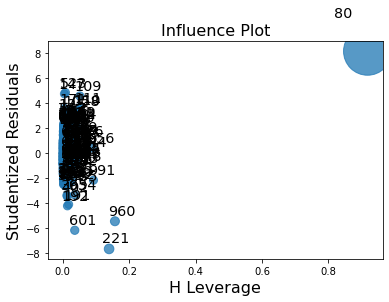

In [16]:
influence_plot(model_1)
plt.show()

#### Here from influence plot, we can see that few of the observations are outliers viz., 80,221,601,960.
#### We will remove/eliminate these observations from the dataset.

In [17]:
toyota_1 = toyota_std.drop(toyota_std.index[[80, 221, 601, 960]], axis=0).reset_index()
toyota_1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...,...
1427,1431,0.111901,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1428,1432,0.230728,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1429,1433,0.147425,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1430,1434,0.103020,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


##### Extra 'index' column has formed. So dropping the 'index' column.

In [18]:
toyota_1 = toyota_1.drop(['index'], axis=1)
toyota_1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1427,0.111901,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1428,0.230728,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1429,0.147425,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1430,0.103020,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


### Builing the model with the new dataset.

In [19]:
model_final = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota_1).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1431.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:31:03   Log-Likelihood:                 2480.8
No. Observations:                1432   AIC:                            -4944.
Df Residuals:                    1423   BIC:                            -4896.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3664      0.014     26.215      0.000       0.339       0.394
Age_08_04        -0.3096      0.007    -45.149      0.000      -0.323      -0.296
KM               -0.1527      0.010    -14.976      0.000      -0.173      -0.133
HP                0.1499      0.012     12.647      0.000       0.127       0.173
cc               -1.9257      0.155    -12.420      0.000      -2.230      -1.622
Doors            -0.0154      0.004     -3.904      0.000      -0.023      -0.008
Gears             0.0499      0.019      2.636      0.008       0.013       0.087
Quarterly_Tax     0.0345      0.013      2.701      0.007       0.009       0.060
Weight            0.7034      0.028     25.085      0.000       0.648       0.758
==============================================================================
Omnibus:                       75.065   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.214
Skew:                           0.120   Prob(JB):                     6.28e-56
Kurtosis:                       5.050   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Adj. R-squared is approx 88.9% which  is very good. Also the p-values for all features is within the limit (<0.05). 
#### So we can say that the, model is best fitted.

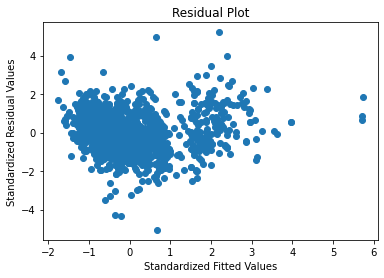

In [20]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(model_final.fittedvalues),
           get_standardized_values(model_final.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

* There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance.